# Introduction

<div class="alert alert-warning">
<font color=black>

**What?** Varying regularization in Multi-Layer Perceptron

</font>
</div>

# Import modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

# Create synthetic dataset

In [3]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)

X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

# How regularisation works

In [ ]:
"""
Regularization term (aka penalty term) combats overfitting by constraining the size of the weights. 

Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in
a decision boundary plot that appears with lesser curvatures. 

DECREASING alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting 
in a more complicated decision boundary.
"""

# Create model

In [ ]:
"""
From the doc we read:
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
means if no value is provided for hidden_layer_sizes then default architecture will have one input layer,
one hidden layer with 100 units and one output layer.

https://stackoverflow.com/questions/35363530/python-scikit-learn-mlpclassifier-hidden-layer-sizes

alphafloat, default=0.0001 -> L2 penalty (regularization term) parameter.

"""

In [26]:
h = .02  # step size in the mesh

#alphas = np.logspace(-3, 1, 7)
#alphas = np.linspace(0, 10, 10)
alphas = [0.0, 0.005, 0.01, 0.1, 0.5, 1, 2]

print("Regularisatoin values: ", alphas)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs',
            alpha=alpha,
            random_state=1,
            max_iter=2000,
            early_stopping=True,
            #hidden_layer_sizes=[100, 100],
            hidden_layer_sizes=(50, 50, 50),
        )
    ))
    names.append(f"alpha {alpha:.2f}")

Regularisatoin values:  [0.0, 0.001, 0.01, 0.1, 0.5, 1, 2]


# Plotting

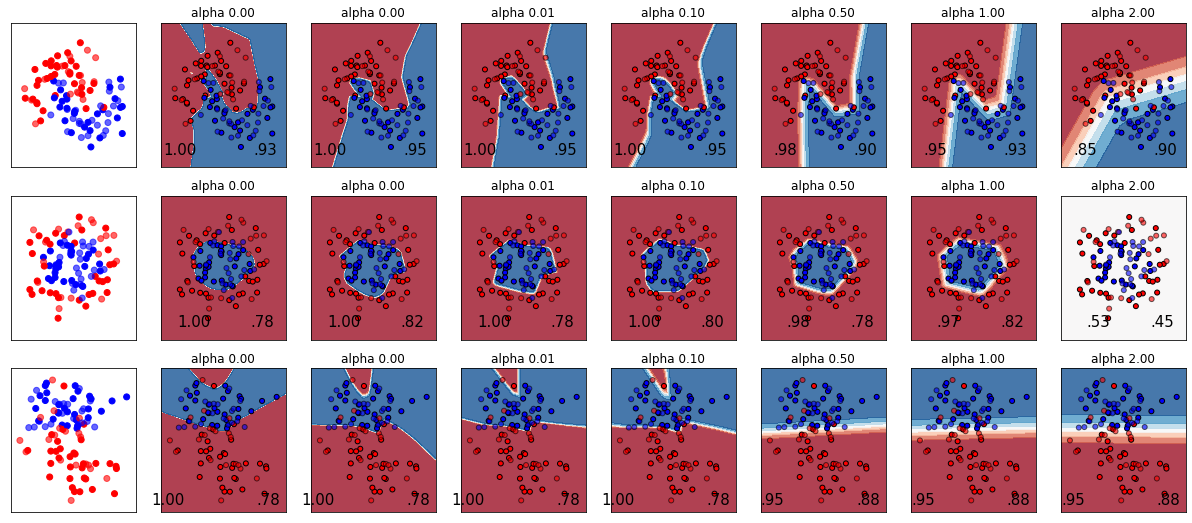

In [47]:
figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score_train = clf.score(X_train, y_train)
        score = clf.score(X_test, y_test)
        #print(name, "score: %f" % score)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)

        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        ax.text(xx.min()+1.3, yy.min() + .3, ('%.2f' % score_train).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

# References

<div class="alert alert-warning">
<font color=black>

- https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

</font>
</div>